In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as sig
import pandas as pd

In [2]:
def stim_plot(ts,Fs):
    plt.figure()
    plt.subplot(211)
    plt.plot(np.linspace(0,ts.shape[0]/Fs,ts.shape[0]),ts)
    
    plt.subplot(212)
    F,Pxx = sig.welch(ts,fs=Fs,nfft=2**15,nperseg=2**10,noverlap=2**10-5)
    plt.plot(F,(Pxx),linewidth=5,label='Sampled')
    
    return F

def raw(timeseries):
    stim_plot(timeseries[:,1],Fs=1e6)
    
def decimated(timeseries: np.ndarray, Fs: int, factor: int =100, clip_samples):
    '''
        Inputs:
        ------
            timeseries : np.ndarray
                Timeseries for analysis. Assumes dim[0] is time.
    '''
    if clip_samples is None:
        clip_samples = 70_000
    elif clip_samples == -1:
        clip_samples = timeseries.shape[0]

    if factor == 1:
        ds_stim = timeseries[0:clip_samples,...]    
    else:
        ds_stim = sig.decimate(timeseries[0:clip_samples,...],q=factor)
        
    print(stim_plot(ds_stim,Fs=Fs/factor))


SyntaxError: non-default argument follows default argument (2495057284.py, line 15)

In [ ]:
# Relevant Files
ipg_infile = '/home/vscode/data/stim_waveform/ssipgwave_vreg_Ra1p1kOhm_1usdt.txt'
sampling_freq = 1e6

[0.00000000e+00 6.10351562e+00 1.22070312e+01 ... 9.99877930e+04
 9.99938965e+04 1.00000000e+05]


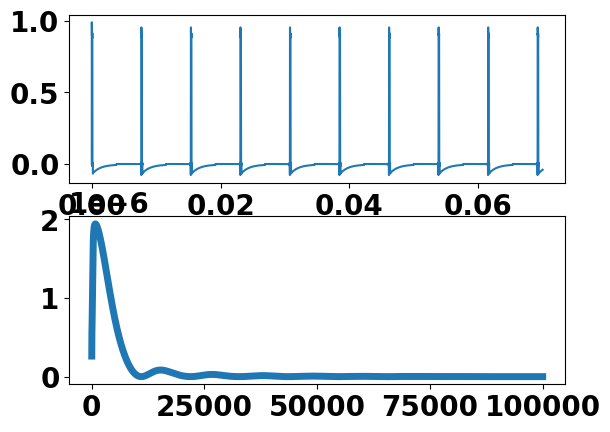

In [ ]:
synthetic_waveform = np.array(pd.read_csv(ipg_infile,sep=',',header=None))
decimated(synthetic_waveform, factor=5)